In [44]:
import numpy as np
import matplotlib.pyplot as plt

In [45]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [118]:
np.random.seed(0)
X = np.random.rand(2000, 2)*10-5
y = np.array(((2*X.T[0] + X.T[1] > -2) & (X.T[0] - 2*X.T[1]< 5) & (X.T[0] + 2*X.T[1]< 5)).astype(int))

X_pos = X[y == 1]
X_neg = X[y == 0]

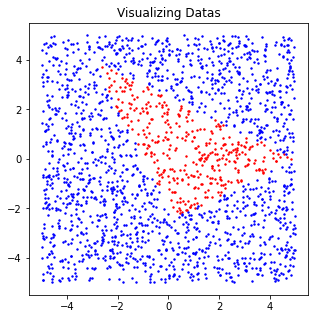

In [119]:
fig1 = plt.figure(figsize = (5,5))
plt.scatter(X_pos[:,0], X_pos[:,1], color = 'red', s=2)
plt.scatter(X_neg[:,0], X_neg[:,1], color = 'blue', s = 2)
plt.title("Visualizing Datas")
plt.show()

In [147]:
print("Before normalization:", np.max(X[:,0]), np.min(X[:,1]))

norm_layer = tf.keras.layers.Normalization(axis = -1)
norm_layer.adapt(X)
X_norm = norm_layer(X)

print("After normalization: ", np.max(X_norm[:,0]), np.min(X_norm[:,1]))

Before normalization: 4.999489702149168 -4.999263005668939
After normalization:  1.7062645 -1.714736


In [153]:
model_tf = Sequential(
    [               
        tf.keras.Input(shape=(2,)),    #specify input size
        ### START CODE HERE ###
        Dense(units = 3, activation = 'sigmoid', name = 'layer1'),
        Dense(units = 1, activation = 'sigmoid', name = 'layer2')
        
        ### END CODE HERE ### 
    ], name = "model_tf" 
)                            


In [154]:
model_tf.summary()

Model: "model_tf"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 3)                 9         
                                                                 
 layer2 (Dense)              (None, 1)                 4         
                                                                 
Total params: 13
Trainable params: 13
Non-trainable params: 0
_________________________________________________________________


In [155]:
model_tf.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(0.005)
)

model_tf.fit(X_norm, y, epochs=200, )

Epoch 1/200
63/63 [==============================] - 1s 2ms/step - loss: 0.4987
Epoch 2/200
63/63 [==============================] - 0s 3ms/step - loss: 0.4609
Epoch 3/200
63/63 [==============================] - 0s 2ms/step - loss: 0.4550
Epoch 4/200
63/63 [==============================] - 0s 3ms/step - loss: 0.4508
Epoch 5/200
63/63 [==============================] - 0s 2ms/step - loss: 0.4463
Epoch 6/200
63/63 [==============================] - 0s 1ms/step - loss: 0.4419
Epoch 7/200
63/63 [==============================] - 0s 2ms/step - loss: 0.4371
Epoch 8/200
63/63 [==============================] - 0s 2ms/step - loss: 0.4324
Epoch 9/200
63/63 [==============================] - 0s 1ms/step - loss: 0.4277
Epoch 10/200
63/63 [==============================] - 0s 1ms/step - loss: 0.4228
Epoch 11/200
63/63 [==============================] - 0s 1ms/step - loss: 0.4182
Epoch 12/200
63/63 [==============================] - 0s 1ms/step - loss: 0.4132
Epoch 13/200
63/63 [=================

In [156]:
np.random.seed(0)
X_test = np.random.rand(1000,2)*6 - 2
y_test = np.array(((2*X_test.T[0] + X_test.T[1] > -2) & \
                    (X_test.T[0] - 2*X_test.T[1]< 5) & \
                    (X_test.T[0] + 2*X_test.T[1]< 5)).astype(int))

In [157]:
def predict(X, normalization, model):
    X = normalization(X)
    prob = model.predict(X).flatten()
    return prob

In [158]:
prediction = predict(X_test, normalization= norm_layer, model= model_tf)
y_hat = (prediction > 0.5).astype(int)

32/32 [==============================] - 0s 1ms/step


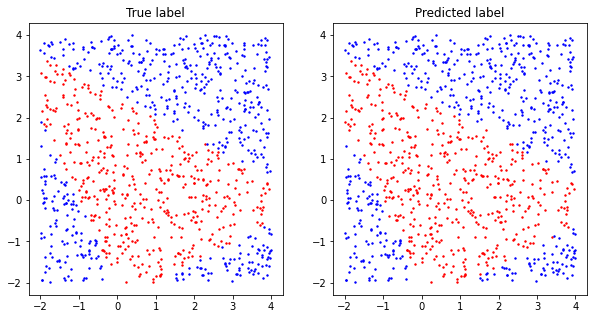

accuracy = 98.90


In [159]:
X_test_pos = X_test[y_test == 1.]
X_test_neg = X_test[y_test == 0.]
X_pos_hat = X_test[y_hat == 1.]
X_neg_hat = X_test[y_hat == 0.]

fig2 = plt.figure(figsize = (10, 5))
plt.subplot(121)
plt.scatter(X_test_pos[:,0], X_test_pos[:,1], color = 'red', s=2)
plt.scatter(X_test_neg[:,0], X_test_neg[:,1], color = 'blue', s = 2)
plt.title("True label")

plt.subplot(122)
plt.scatter(X_pos_hat[:,0], X_pos_hat[:,1], color = 'red', s=2)
plt.scatter(X_neg_hat[:,0], X_neg_hat[:,1], color = 'blue', s = 2)
plt.title("Predicted label")
plt.show()

accuracy_array = (y_hat == y_test).astype(int)
accuracy = np.sum(accuracy_array)/len(accuracy_array)
print(f"accuracy = {accuracy * 100:.2f}")